## refs: https://github.com/Ransaka/GMM-from-scratch

In [25]:
#import requred libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from scipy.stats import norm
import warnings
import random

warnings.filterwarnings('ignore')

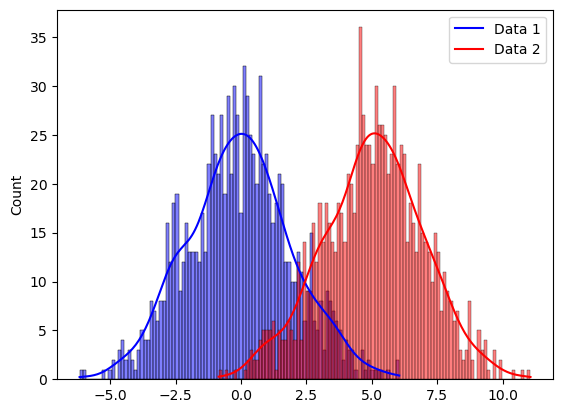

In [7]:
# Generate some data with multiple modes
data1 = np.random.normal(0, 2, 1000) #產生常態分佈資料
data2 = np.random.normal(5, 2, 1000)

# Plot the data using seaborn's distplot function
sns.histplot(data1, kde=True, bins=100, color='b')
sns.histplot(data2, kde=True, bins=100, color='r')

# Add a legend
plt.legend(['Data 1', 'Data 2'])

# Show the plot
plt.show()


### 這邊先產生一些複雜的資料來試試看

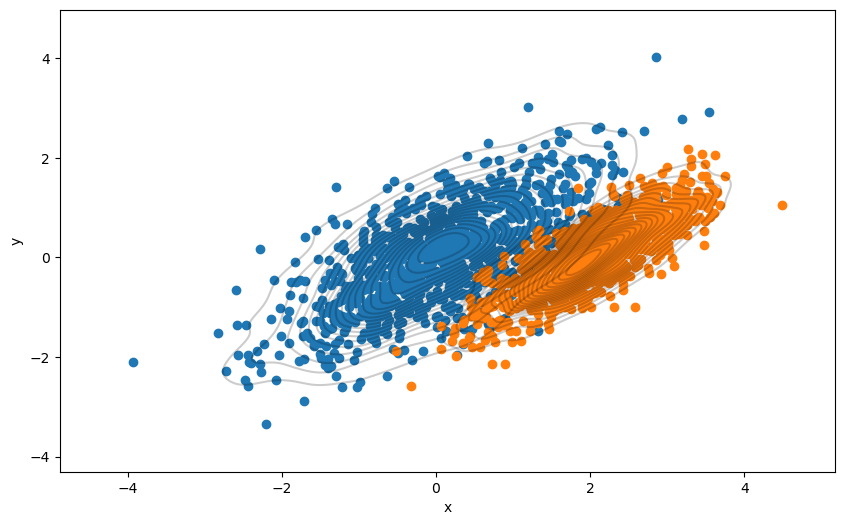

In [41]:
# Set the mean and covariance
mean1 = [0, 0]
mean2 = [2, 0]
cov1 = [[1, .7], [.7, 1]]
cov2 = [[.5, .4], [.4, .5]]

# Generate data from the mean and covariance
data1 = np.random.multivariate_normal(mean1, cov1, size=1000)
data2 = np.random.multivariate_normal(mean2, cov2, size=1000)
df1 = pd.DataFrame(data1, columns=['x', 'y'])
df2 = pd.DataFrame(data2, columns=['x', 'y'])
plt.figure(figsize=(10,6))

plt.scatter(data1[:,0],data1[:,1])
plt.scatter(data2[:,0],data2[:,1])

sns.kdeplot(df1, x='x', y='y', levels=20, linewidth=10, color='k', alpha=0.2)
sns.kdeplot(df2, x='x', y='y', levels=20, linewidth=10, color='k', alpha=0.2)

plt.grid(False)
plt.show()

這邊使用了平均值和變異數矩陣產生了隨機的高斯分佈。

高斯混合模型（GMM）所做的事情則是要做逆向的這個過程，根據資料(藍色點以及紅色點)，回推出高斯分佈的參數。

一開始，我們並不知道會有幾群或它們相關的平均值和變異數矩陣。

過程按照以下步驟進行：

1. 決定群集的數量。
2. 假設我們有1000個數據點，並設定群組數為2。
3. 初始化每個群集的平均值、變異數和權重參數。
4. 使用期望最大化演算法(Expectation Maximization algorithm )執行以下操作：
   1. 期望步驟（E步）：計算每個數據點屬於每個數據點的機率，然後使用當前參數估計值(current estimate for the parameters)計算似然函數(likelihood function)
   2. 最大化步驟（M步）：更新先前的平均值、變異數和權重參數，以最大化E步中發現的期望似然
   3. 重複這些步驟直到模型收斂。

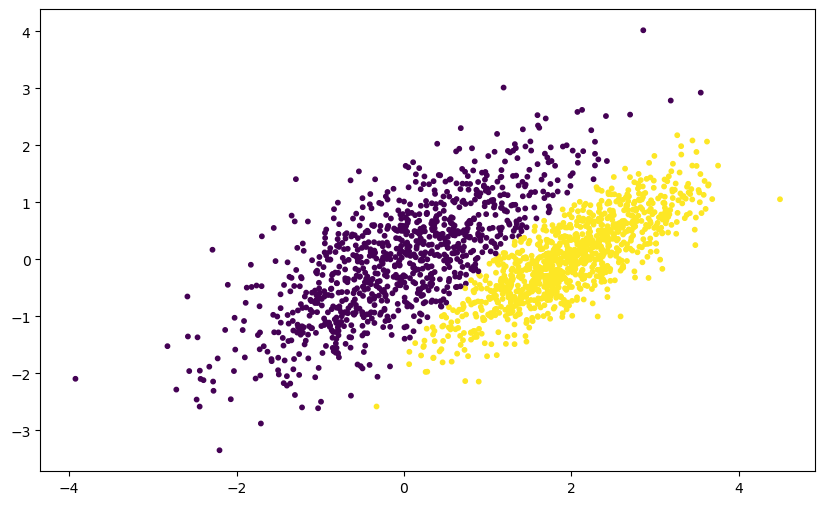

In [51]:
from sklearn.mixture import GaussianMixture
X = np.concatenate((data1, data2))
gmm = GaussianMixture(n_components=2).fit(X)
labels = gmm.predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis');

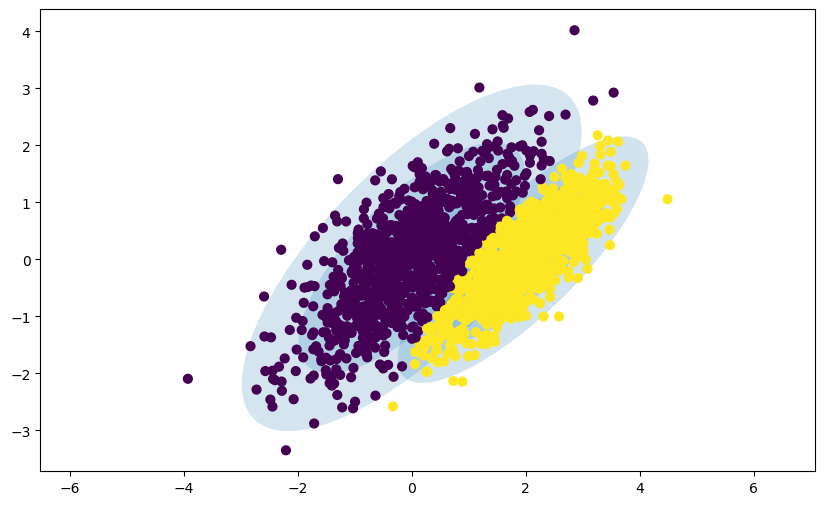

In [53]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
        
        
gmm = GaussianMixture(n_components=2, random_state=42)
plt.figure(figsize=(10,6))
plot_gmm(gmm, X)